# Baseline Wander Filtering Via High Pass Filter

#### We have used the high pass filter built-in function from MATLAB to eliminate baseline noise from ecg signals.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import matlab.engine


In [13]:
class HighPassFilter:
    
    rcParams['figure.figsize'] = 25.5, 10.5 #configuration settings for the plotting window
    
    def extract_column(self, dataset, header_name):
        header_extracted_data = dataset.loc[:,header_name].tolist()
        timestamp = dataset.loc[:,'timest'].tolist() #timestamp stays four every our graph's Y axis
        return header_extracted_data,timestamp
    
    def highpass_filter(self, dataset, fs): #sample rate of our signal is fs=290hz
        eng = matlab.engine.start_matlab()  # creates a MATLAB session
        dataset_mat = eng.cell2mat(dataset)
        dataset_filtered = eng.highpass(dataset_mat,10,fs)
        dataset_filtered = eng.medfilt1(dataset_filtered,10) #additional medial filter to reduce noice after baseline removal
        dataset_list = eng.mat2cell(dataset_filtered,1,len(dataset))
        dataset_np = np.asarray(dataset_list)
        dataset_np = np.reshape(dataset_np,(len(dataset),1))
        return dataset_np
        
    def plot_dataset(self, extracted_header_name, filtered_dataset, dataset, y_axis):
        plt.plot(y_axis, dataset)
        plt.plot(y_axis, filtered_dataset)
        plt.ylabel(extracted_header_name,fontsize=25)
        plt.xlabel('timestamp',fontsize=25)



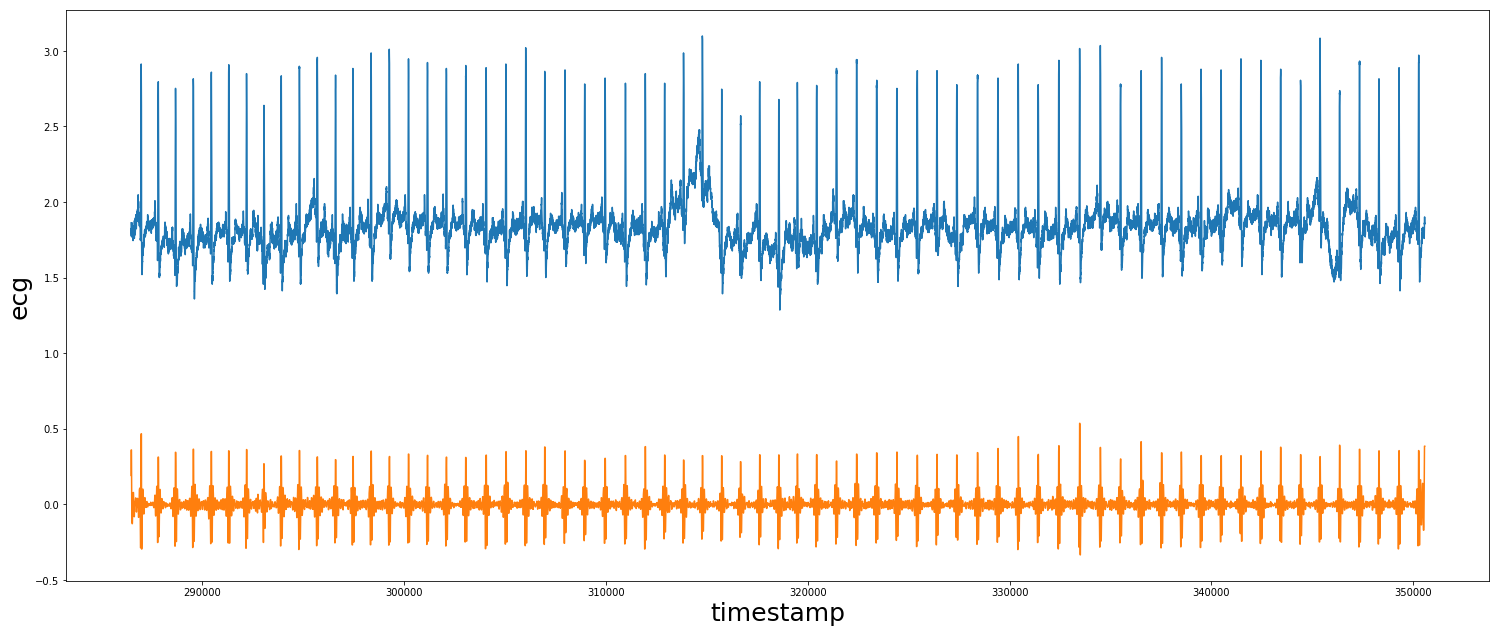

In [14]:
if __name__ == '__main__' and '__file__' not in globals():
    obj = HighPassFilter()
    dataset = pd.read_csv(".//Emotion_Dataframes//Participant01//anger//s01_anger_video01.csv")
    extracted_data, timest = obj.extract_column(dataset, "ecg")
    filtered_data = obj.highpass_filter(extracted_data, 290)
    obj.plot_dataset("ecg",filtered_data,extracted_data,timest)

## The formula to calculate Heart Rate from the Signal Output;
#### duration_seconds=len(filtered_dataset)/fs;
#### duration_minutes=duration_seconds/60;
#### HR= r_peaks/duration_minutes;